# Credit Limit

![image](image.png)


# Giriş 🌟


Müşteri kaybı, müşterilerin bir şirketle iş yapmayı bıraktığı durum olarak, bankacılık dahil çeşitli endüstrilerdeki işletmeler için kritik bir endişe kaynağıdır. Müşteri kaybına katkıda bulunan faktörleri anlamak, bankaların müşterileri elde tutma ve karlılığı sürdürme stratejileri geliştirmesine yardımcı olabilir. Müşteri kaybı analizine ek olarak, kredi kartı kullanımı desenlerinin analizi, müşteri davranışı ve tercihleri hakkında değerli içgörüler sağlar.


### Gerekli Kütüphaneleri İçeri Aktarma📦

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def pandas_ince_ayar():
    pd.set_option('display.max_columns', None)
    pd.set_option("display.max_rows", None)
    pd.set_option('display.width', 500)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.float_format', lambda x: "%.1f" % x)
    warnings.simplefilter(action='ignore', category=Warning)


# Fonksiyonu çağırarak ayarları belirleyebilirsiniz
pandas_ince_ayar()

# Veri Ön İşleme ve Doğrulama 🧹

In [3]:
# Import the Credit_Limit.csv file
df = pd.read_csv('Credit_Limit.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,39,5,3,12691.0,777,11914.0,1144
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,44,6,2,8256.0,864,7392.0,1291
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,36,4,0,3418.0,0,3418.0,1887
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,34,3,1,3313.0,2517,796.0,1171
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,21,5,0,4716.0,0,4716.0,816


## Veriye Genel Bakış

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)
    print("##################### Nunique #####################")
    print(dataframe.nunique())

check_df(df)

##################### Shape #####################
(10127, 15)
##################### Types #####################
CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Trans_Amt               int64
dtype: object
##################### Head #####################
   CLIENTNUM     Attrition_Flag  Customer_Age Gender Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt
0  768805383  Existing Customer      

#### Veri setiyle ilgili bazı bilgiler:

- Toplamda 10,127 giriş var ve 15 sütun. 
- Müşterilerin yaşları, cinsiyetleri, eğitim seviyeleri, medeni durumları, gelir kategorileri ve kredi kartı kategorileri gibi özellikler bulunmakta. 

#### Ayrıca müşterilerin kredi limitleri, kredi kartı kullanımı ve diğer finansal ölçütler de veri setinde yer alıyor. 

In [5]:
# Veri temizleme ve doğrulama analizi gerçekleştirelim

# Eksik değerlere sahip tüm satırları uçuralım 
data_cleaned = df.dropna()

# Temizlenmiş veri kümesinin şeklini kontrol edin
data_cleaned.shape

# "Attrition_Flag" sütununu kategorik bir veri türüne dönüştürün
data_cleaned["Attrition_Flag"] = data_cleaned["Attrition_Flag"].astype("category")

# "Cinsiyet" sütununu kategorik bir veri türüne dönüştürün
data_cleaned["Gender"] = data_cleaned["Gender"].astype("category")

# "Education_Level" sütununu kategorik bir veri türüne dönüştürün
data_cleaned["Education_Level"] = data_cleaned["Education_Level"].astype("category")

# "Marital_Status" sütununu kategorik bir veri türüne dönüştürün
data_cleaned["Marital_Status"] = data_cleaned["Marital_Status"].astype("category")

# "Income_Category" sütununu kategorik bir veri türüne dönüştürün
data_cleaned["Income_Category"] = data_cleaned["Income_Category"].astype("category")

# "Card_Category" sütununu kategorik bir veri türüne dönüştürün
data_cleaned["Card_Category"] = data_cleaned["Card_Category"].astype("category")

# Dönüştürmeden sonra sütunların veri türlerini kontrol edin
data_cleaned.dtypes


CLIENTNUM                      int64
Attrition_Flag              category
Customer_Age                   int64
Gender                      category
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Trans_Amt                int64
dtype: object

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt
0,768805383,Existing Customer,45,M,High School,Married,$60K - $80K,Blue,39,5,3,12691.0,777,11914.0,1144
1,818770008,Existing Customer,49,F,Graduate,Single,Less than $40K,Blue,44,6,2,8256.0,864,7392.0,1291
2,713982108,Existing Customer,51,M,Graduate,Married,$80K - $120K,Blue,36,4,0,3418.0,0,3418.0,1887
3,769911858,Existing Customer,40,F,High School,Unknown,Less than $40K,Blue,34,3,1,3313.0,2517,796.0,1171
4,709106358,Existing Customer,40,M,Uneducated,Married,$60K - $80K,Blue,21,5,0,4716.0,0,4716.0,816


# Keşifçi Veri Analizi📚
### Kategorik  değişkenler arası korelasyon analizi

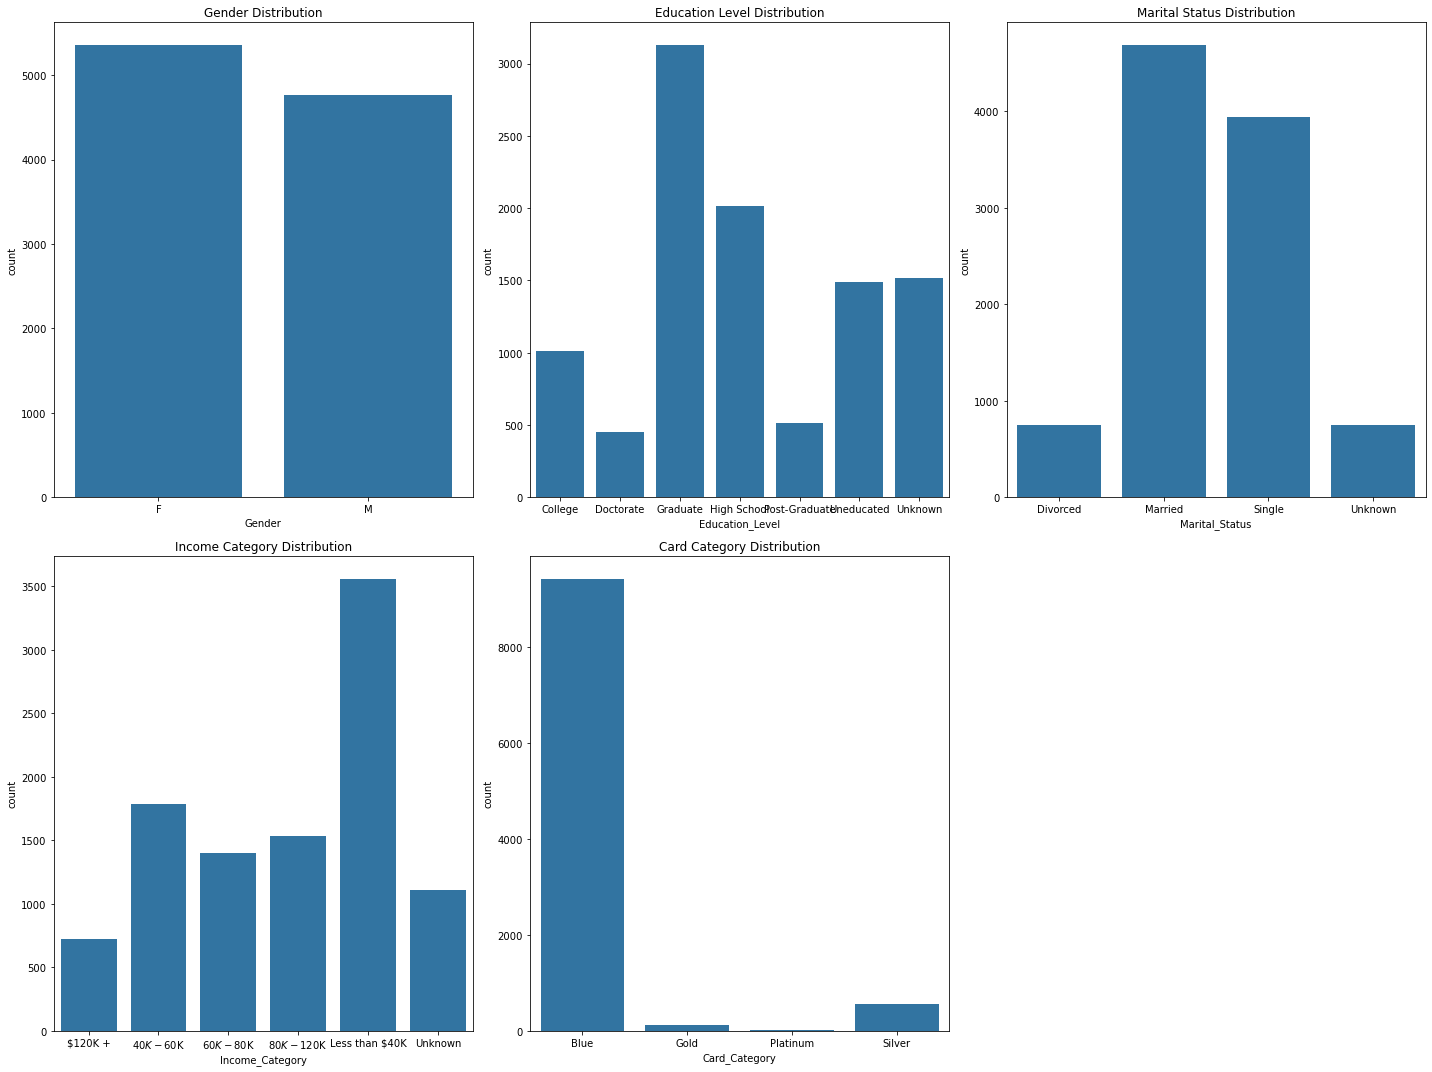

In [7]:
# Kategorik değişkenlerin dağılımlarını görselleştirme
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=data_cleaned)
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='Education_Level', data=data_cleaned)
plt.title('Education Level Distribution')

plt.subplot(2, 3, 3)
sns.countplot(x='Marital_Status', data=data_cleaned)
plt.title('Marital Status Distribution')

plt.subplot(2, 3, 4)
sns.countplot(x='Income_Category', data=data_cleaned)
plt.title('Income Category Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='Card_Category', data=data_cleaned)
plt.title('Card Category Distribution')

plt.tight_layout()
plt.show()


### her bir kategorik değişken için attrition durumuna göre gruplandırılmış çubuk grafikleri

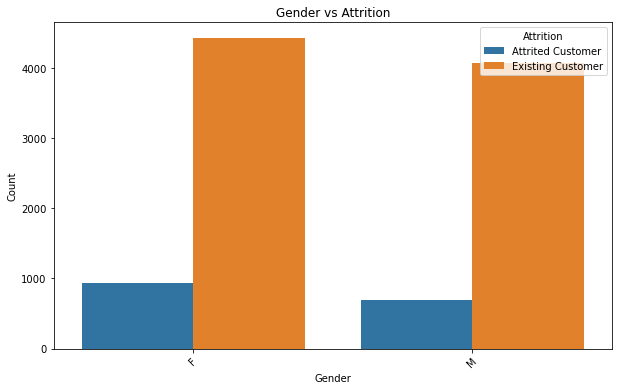

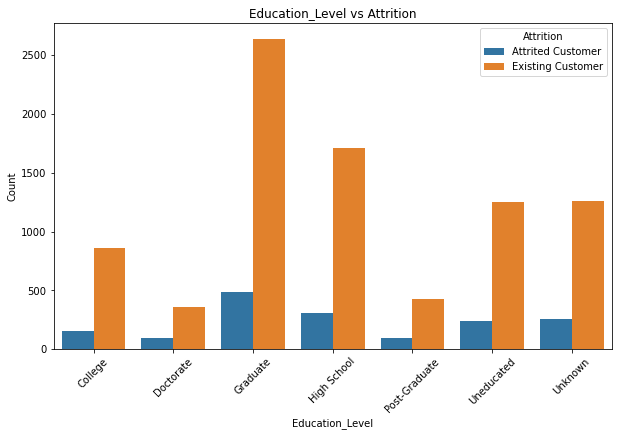

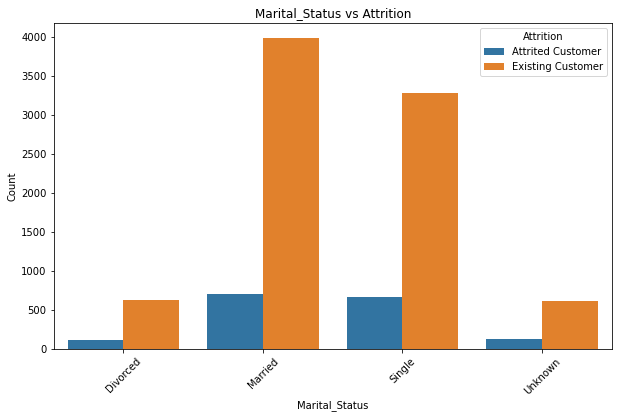

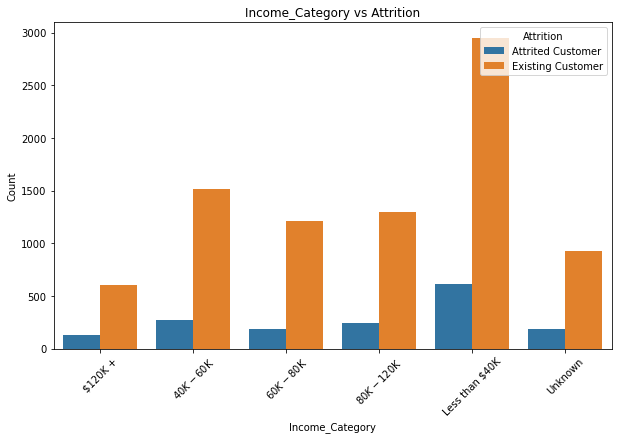

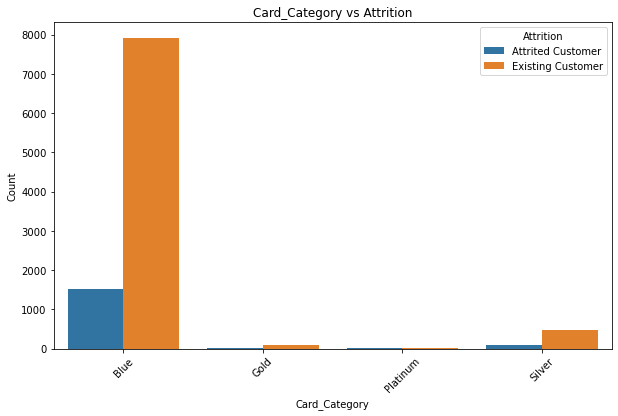

In [8]:
# Kategorik değişkenlerin listesi
categorical_variables = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# Her bir kategorik değişken için çubuk grafikleri çizin
for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, hue="Attrition_Flag", data=data_cleaned)
    plt.title(f"{variable} vs Attrition")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Attrition", loc="upper right")
    plt.show()


## Değişken İlişkilerini Keşfetme:  Korelasyon Matrisi Isı Haritası


Bu kod, veri setinizdeki sayısal değişkenler arasındaki korelasyonu hesaplayacak ve ardından bu korelasyonları ısı haritası olarak görselleştirecektir. annot=True parametresi, her hücredeki korelasyon değerlerini göstermek için kullanılır. cmap='coolwarm' parametresi, kullanılan renk haritasını belirler.



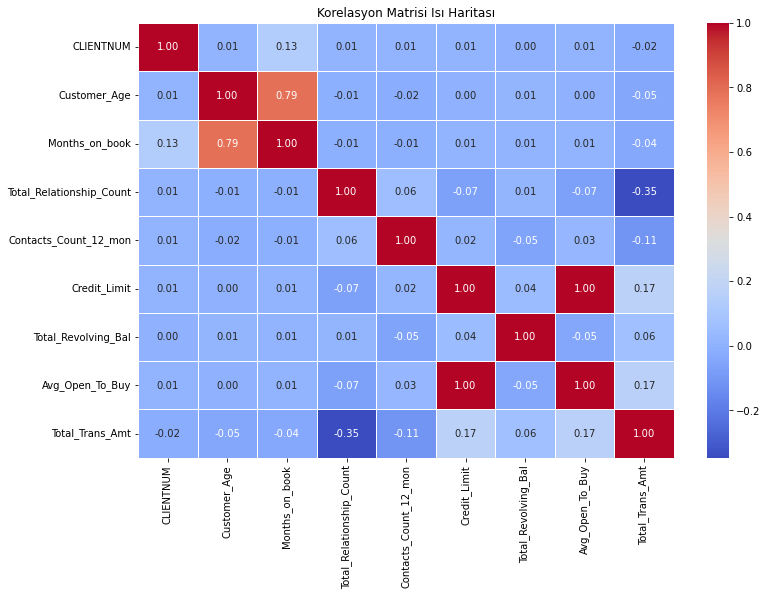

In [9]:
# Yalnızca sayısal verileri içeren bir alt veri kümesi oluşturma
numeric_data = data_cleaned.select_dtypes(include=np.number)

# Korelasyon matrisini yeniden hesaplayın
correlation_matrix = numeric_data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()


## Değişken İlişkilerini Keşfetme: Phik Korelasyon Isı Haritası

interval columns not set, guessing: ['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt']


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


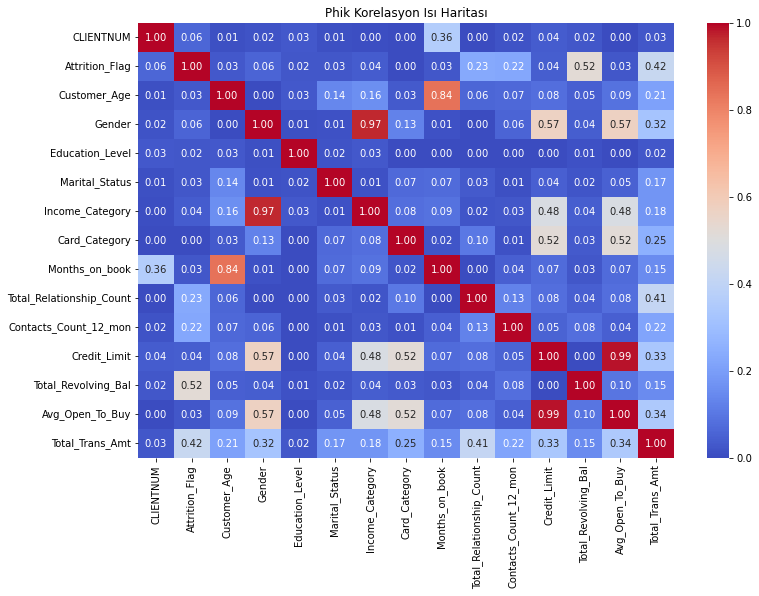

In [10]:
# Phik korelasyonu için gerekli kütüphane
import phik

# Phik korelasyon matrisini hesapla
phik_matrix = data_cleaned.phik_matrix()

# Korelasyon matrisini ısı haritası olarak görselleştir
plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Phik Korelasyon Isı Haritası')
plt.show()


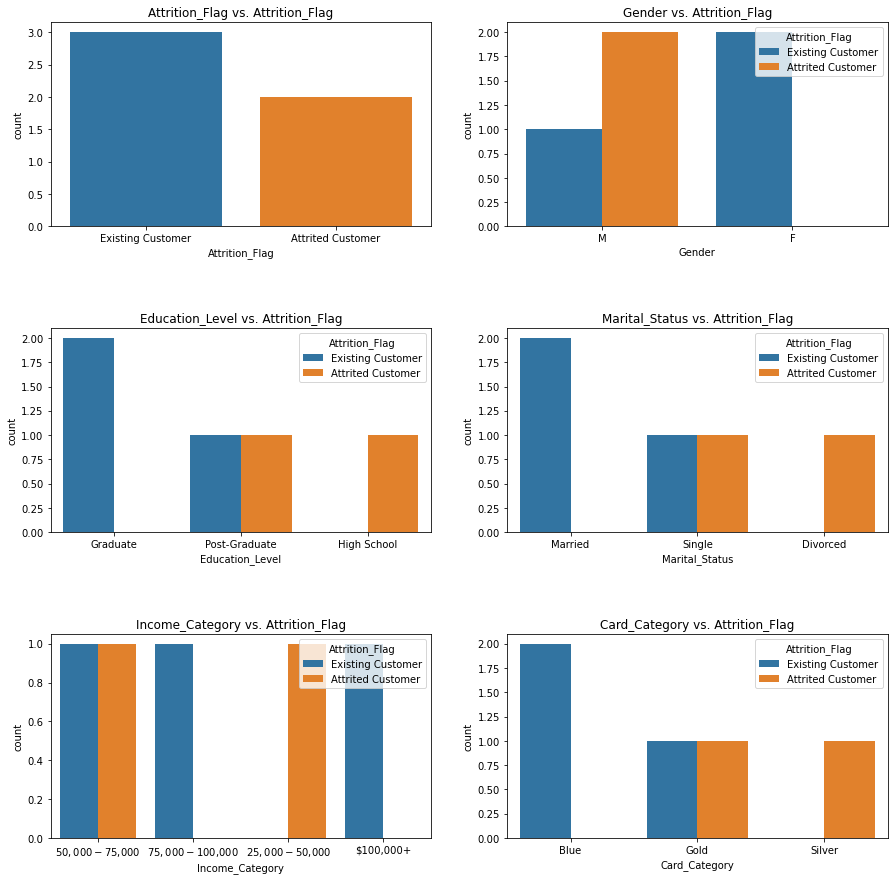

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Örnek olarak, müşteri sadakatini etkileyebilecek bazı özelliklere sahip bir veri seti oluşturuyoruz.
data = pd.DataFrame({
    'CLIENTNUM': [1, 2, 3, 4, 5],
    'Attrition_Flag': ['Existing Customer', 'Existing Customer', 'Attrited Customer', 'Existing Customer', 'Attrited Customer'],
    'Customer_Age': [35, 45, 28, 50, 40],
    'Gender': ['M', 'F', 'M', 'F', 'M'],
    'Education_Level': ['Graduate', 'Post-Graduate', 'High School', 'Graduate', 'Post-Graduate'],
    'Marital_Status': ['Married', 'Single', 'Single', 'Married', 'Divorced'],
    'Income_Category': ['$50,000-$75,000', '$75,000-$100,000', '$25,000-$50,000', '$100,000+', '$50,000-$75,000'],
    'Card_Category': ['Blue', 'Gold', 'Silver', 'Blue', 'Gold'],
    'Months_on_book': [24, 36, 12, 48, 30],
    'Total_Relationship_Count': [3, 5, 2, 6, 4],
    'Contacts_Count_12_mon': [2, 3, 1, 4, 2],
    'Credit_Limit': [5000, 10000, 3000, 15000, 8000],
    'Total_Revolving_Bal': [1000, 2000, 500, 3000, 1500],
    'Avg_Open_To_Buy': [4000, 8000, 2500, 12000, 6500],
    'Total_Trans_Amt': [2000, 3000, 1000, 5000, 2500]
})

# Veri setindeki kategorik sütunları tanımlayalım
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Seçilen kategorik sütunlardaki değerlerin dağılımını görselleştirme
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, hue='Attrition_Flag', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{column} vs. Attrition_Flag')

plt.subplots_adjust(hspace=0.5)
plt.show()


## Analysing Categorical Data

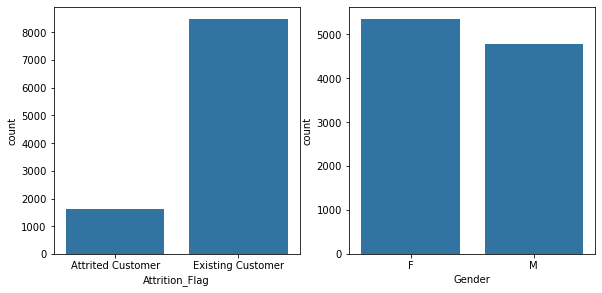

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='Attrition_Flag', data=data_cleaned)

plt.subplot(2, 3, 2)
sns.countplot(x='Gender', data=data_cleaned)

plt.show()

### Müşteri Kaybı Analizi
Bu süreçte, 'Attrition_Flag' (müşteri kaybı) sütunu üzerinde bir gruplandırma gerçekleştirir ve her kategori için sayısal özelliklerin ortalamasını gösterir.

In [13]:
# Kategorik sütunları sayısal temsillere dönüştürün
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
data['Education_Level'] = data['Education_Level'].map({'Graduate': 0, 'Post-Graduate': 1, 'High School': 2}) 
data['Marital_Status'] = data['Marital_Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
data['Income_Category'] = data['Income_Category'].map({'$25,000-$50,000': 0, '$50,000-$75,000': 1, '$75,000-$100,000': 2, '$100,000+': 3})
data['Card_Category'] = data['Card_Category'].map({'Blue': 0, 'Silver': 1, 'Gold': 2}) 

# Verileri 'Attrition_Flag' ile gruplandırarak ve sayısal özelliklerin ortalamasını hesaplayarak
churn_analysis = data.groupby('Attrition_Flag').mean()

# Churn analizi sonuçlarını görüntüleme
print("Customer Churn Analysis:")
print(churn_analysis)


Customer Churn Analysis:
                CLIENTNUM  Customer_Age  Gender  Education_Level  Marital_Status  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Amt
Attrition_Flag                                                                                                                                                                                                                                        
0                     2.3          43.3     0.7              0.3             0.7              2.0            0.7            36.0                       4.7                    3.0       10000.0               2000.0           8000.0           3333.3
1                     4.0          34.0     0.0              1.5             1.0              0.5            1.5            21.0                       3.0                    1.5        5500.0               1000.0           4500.0     

### Kategorik Sütunların İlişkisi

Bu, 'Gender' sütunu ile 'Attrition_Flag' sütunu arasındaki ilişkiyi görselleştirir.

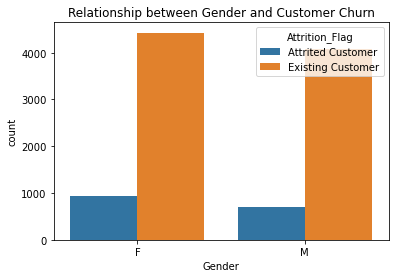

In [14]:
# Kategorik sütunlar arasındaki ilişkiyi analiz etme

sns.countplot(x='Gender', hue='Attrition_Flag', data=data_cleaned)
plt.title('Relationship between Gender and Customer Churn')
plt.show()


### Gelir Seviyesine Göre Analiz

Bu alanda, 'Income_Category' (gelir seviyesi) sütunu ile 'Credit_Limit' sütunu arasındaki ilişkiyi görselleştirir

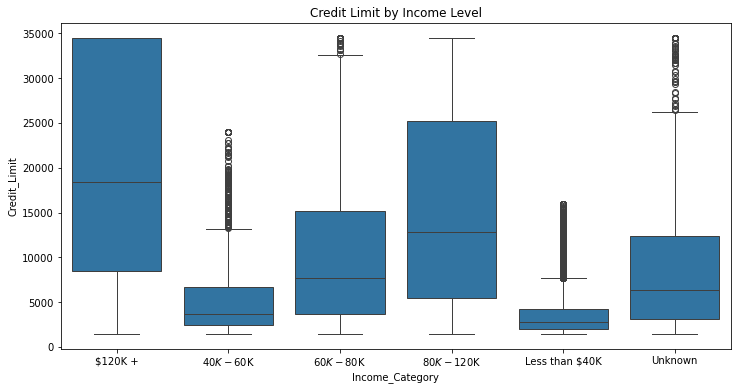

In [15]:
#Analysis by Income Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=data_cleaned)
plt.title('Credit Limit by Income Level')
plt.show()

### Yaş ve Toplam Harcama Arasındaki İlişki

müşteri yaşına göre toplam harcamanın müşteri kaybı üzerindeki etkisini görselleştirir

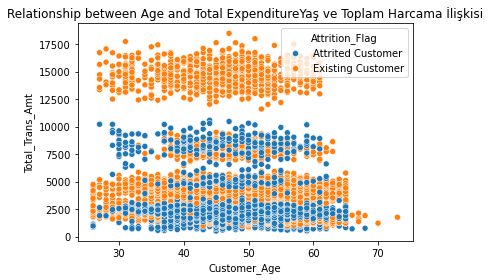

In [16]:
# Yaş ve toplam harcama arasındaki ilişkinin analiz edilmesi
sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', hue='Attrition_Flag', data=data_cleaned)
plt.title('Relationship between Age and Total ExpenditureYaş ve Toplam Harcama İlişkisi')
plt.show()


### Müşteri Davranış Analizi

Bu kod, müşterilerin toplam işlem tutarı ile döner bakiye arasındaki ilişkiyi görselleştirmektedir. İkinci grafik, müşteri kaybına göre toplam işlem tutarını göstermektedir.

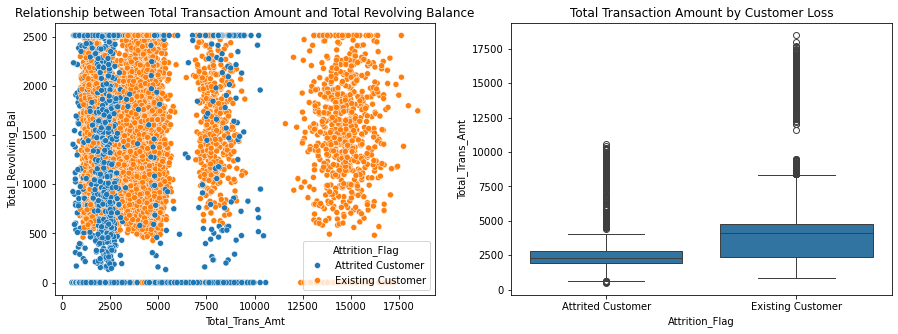

In [17]:
# Müşteri Davranış Analizi
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Total_Trans_Amt', y='Total_Revolving_Bal', hue='Attrition_Flag', data=data_cleaned)
plt.title('Relationship between Total Transaction Amount and Total Revolving Balance')

plt.subplot(1, 2, 2)
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Amt', data=data_cleaned)
plt.title('Total Transaction Amount by Customer Loss')

plt.show()

### Gelir ve Kredi Limiti Arasındaki İlişki

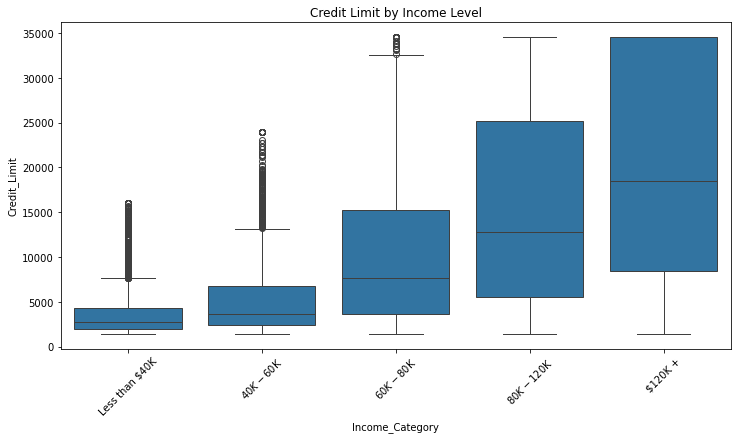

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Credit_Limit', data=data_cleaned, order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'])
plt.title('Credit Limit by Income Level')
plt.xticks(rotation=45)
plt.show()

### Veri Görselleştirme ve İnteraktif Grafikler

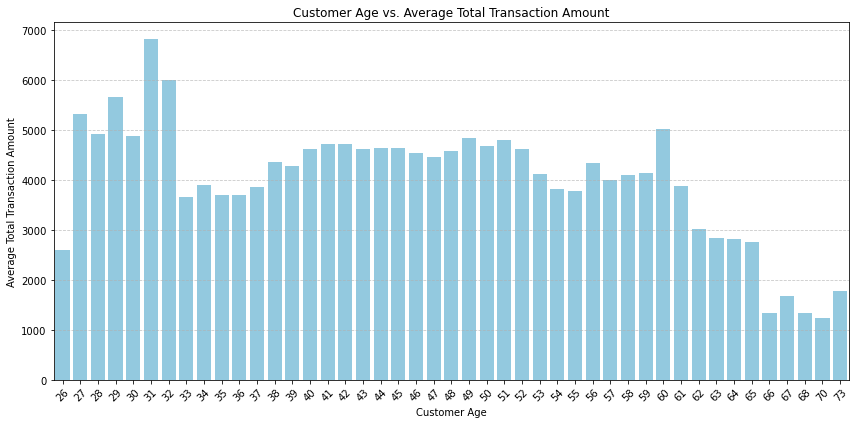

In [19]:
# Müşteri yaşlarına göre ortalama toplam harcamaları hesapla
avg_total_trans_by_age = data_cleaned.groupby('Customer_Age')['Total_Trans_Amt'].mean().reset_index()

# Çubuk grafiği oluşturma
plt.figure(figsize=(12, 6))
sns.barplot(x='Customer_Age', y='Total_Trans_Amt', data=avg_total_trans_by_age, color='skyblue')
plt.title('Customer Age vs. Average Total Transaction Amount')
plt.xlabel('Customer Age')
plt.ylabel('Average Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### müşterilerin yaşlarına göre terk eden ve terk etmeyen müşterilerin dağılımını gösteren bir histogram oluşturur.

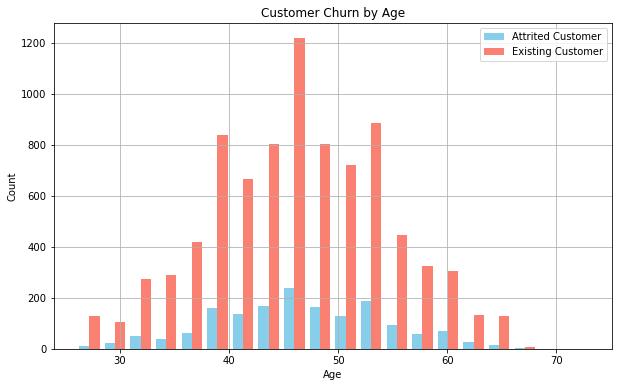

In [20]:
# Terk eden ve terk etmeyen müşterilerin yaşlarını ayrı ayrı alalım
churned_customers_age = data_cleaned[data_cleaned['Attrition_Flag'] == 'Attrited Customer']['Customer_Age']
existing_customers_age = data_cleaned[data_cleaned['Attrition_Flag'] == 'Existing Customer']['Customer_Age']

# Histogramı oluşturalım
plt.figure(figsize=(10, 6))
plt.hist([churned_customers_age, existing_customers_age], bins=20, color=['skyblue', 'salmon'], label=['Attrited Customer', 'Existing Customer'])
plt.title('Customer Churn by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


### İleri Analizler ve Modelleme

Bu süreç, bir Rastgele Orman sınıflandırıcısı kullanarak müşteri kaybını tahmin etmek için bir model oluşturur. Modelin performansını değerlendirmek için karışıklık matrisini ve sınıflandırma raporu sonuçlarını görüntüler.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Veri setini hazırlama
X = data_cleaned.drop('Attrition_Flag', axis=1)
y = data_cleaned['Attrition_Flag']

# Kategorik sütunların tek sıcak kodlaması
X = pd.get_dummies(X, drop_first=True)

# Verileri eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bir Rastgele Orman sınıflandırıcı modeli oluşturma ve eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model değerlendirmesi
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 200  127]
 [  25 1674]]
                   precision    recall  f1-score   support

Attrited Customer       0.89      0.61      0.72       327
Existing Customer       0.93      0.99      0.96      1699

         accuracy                           0.92      2026
        macro avg       0.91      0.80      0.84      2026
     weighted avg       0.92      0.92      0.92      2026



# Model Değerlendirme

Modelimizin performansını değerlendirmek için bu çıktıları yorumlayalım:

1. **Karmaşıklık Matrisi (Confusion Matrix):**
   - Karmaşıklık matrisi, modelinizin doğruluğunu değerlendirmenin bir yoludur. Matris, gerçek sınıfların (satırlar) ve tahmin edilen sınıfların (sütunlar) sayısını gösterir.
   - Sol üst köşedeki değerler, doğru şekilde tahmin edilen 'Attrited Customer' sınıfının sayısını (true negatives - TN) temsil eder.
   - Sağ üst köşedeki değerler, 'Attrited Customer' olarak yanlış şekilde tahmin edilen 'Existing Customer' sınıfının sayısını (false positives - FP) temsil eder.
   - Sol alt köşedeki değerler, 'Existing Customer' olarak yanlış şekilde tahmin edilen 'Attrited Customer' sınıfının sayısını (false negatives - FN) temsil eder.
   - Sağ alt köşedeki değerler, doğru şekilde tahmin edilen 'Existing Customer' sınıfının sayısını (true positives - TP) temsil eder.

2. **Sınıflandırma Raporu (Classification Report):**
   - Sınıflandırma raporu, modelinizin performansını daha ayrıntılı olarak değerlendirmenizi sağlar. Bu rapor, her sınıf için hassasiyet, geri çağırma ve F1-skoru gibi metrikleri sunar.
   - **Hassasiyet (Precision):** Bir sınıf olarak tahmin edilen örneklerin gerçekten o sınıfa ait olanların oranını gösterir. Yüksek hassasiyet, yanlış pozitif tahminlerin az olduğunu gösterir.
   - **Geri Çağırma (Recall):** Bir sınıfa ait olan tüm örneklerin doğru bir şekilde tahmin edilme oranını gösterir. Yüksek geri çağırma, yanlış negatif tahminlerin az olduğunu gösterir.
   - **F1-Skoru (F1-Score):** Hassasiyet ve geri çağırma arasındaki dengeyi sağlar. Düşük F1-skorları, modelin bir sınıfı doğru şekilde tahmin etme yeteneğinin zayıf olduğunu gösterebilir.
   - **Destek (Support):** Her sınıf için gerçek veri noktalarının sayısını temsil eder.

3. **Genel Yorum:**
   - Modelimiz, 'Existing Customer' sınıfını oldukça iyi tahmin ediyor (yüksek hassasiyet ve geri çağırma). Bu, mevcut müşterilerin neredeyse tümünü doğru şekilde tanımladığını gösterir.
   - Ancak, 'Attrited Customer' sınıfını tahmin etme konusunda daha az başarılıdır. Hassasiyet ve geri çağırma değerleri daha düşüktür, bu da bu sınıfı daha az doğru tahmin ettiğini gösterir.
   - Toplam olarak, modelimizin genel doğruluğu yüksektir (%92). Ancak, sınıf dengesizliği nedeniyle, modelin 'Attrited Customer' sınıfını daha iyi tanımlaması için iyileştirmeler yapabiliriz.

